# Homework 8-4

---

## Imports

In [1]:
from thermostate import State, Q_, units, SystemInternational as SI

---

## Definitions

In [2]:
sub_v = 'water'
sub_a = 'air'

Qdot_in = Q_(836.0, 'MW')
T_1 = Q_(40.0, 'degC')

T_2 = Q_(20.0, 'degC')

T_3 = Q_(25.0, 'degC')
p_3 = Q_(1.0, 'atm')
phi_3 = Q_(0.35, 'dimensionless')

T_4 = Q_(35.0, 'degC')
p_4 = p_3
phi_4 = Q_(0.9, 'dimensionless')

T_5 = Q_(20.0, 'degC')

---

## Problem Statement

In the condenser of a power plant, energy is discharged by heat transfer at a rate of 836.0 MW to the cooling water that exits the condenser into the cooling tower at 40.0 celsius. Cooled water at 20.0 celsius is returned to the condenser. Atmospheric air enters the tower at 25.0 celsius, 1.0 atm, 35.00%  relative humidity. Moist air exits at 35.0 celsius, 1.0 atm, 90.00%  relative humidity. Makeup water is supplied at 20.0 celsius. For operation at steady state, and neglecting kinetic and potential energy effects, determine the mass flow rate, in kg/s, of

1. the entering atmospheric air ($\dot{m}_{a3} + \dot{m}_{v3}$)
2. the makeup water

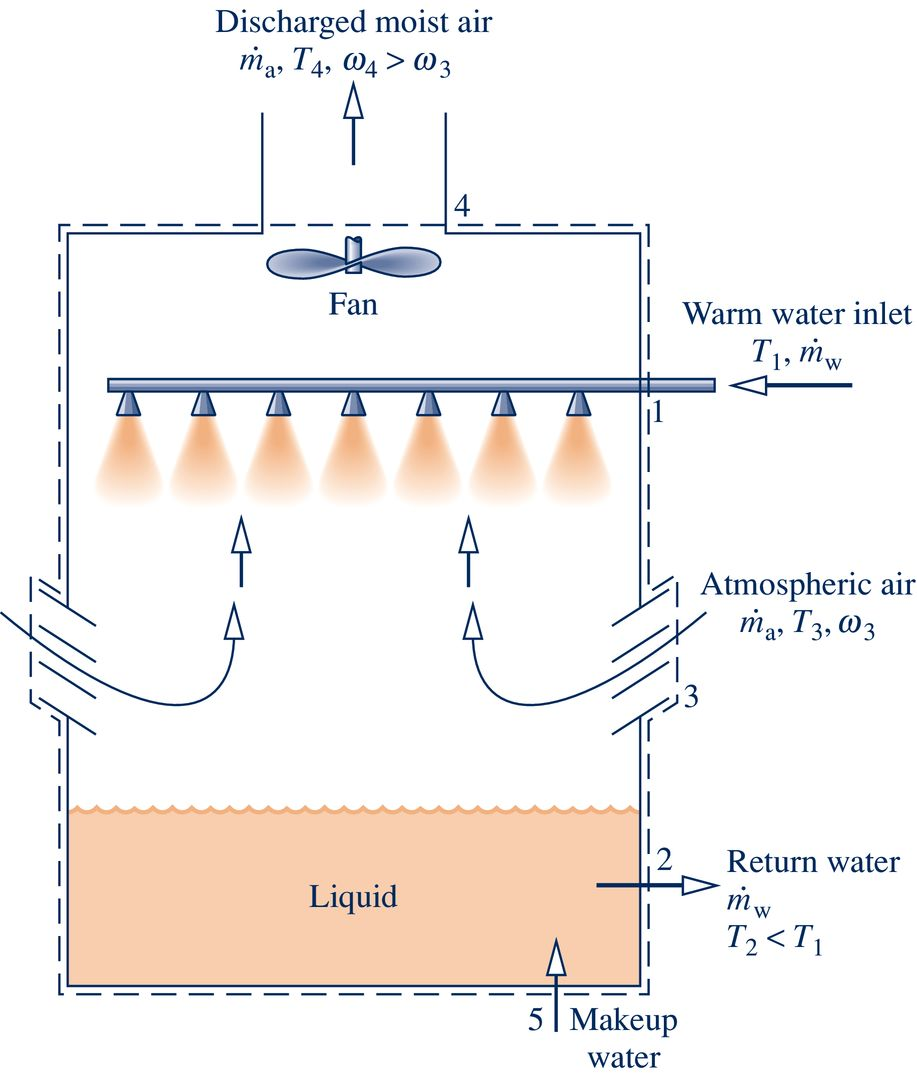

---

## Solution

### 1. the mass flow rate of atmospheric air

First, we need to solve for the flow rate of the liquid water at states 1 and 2. These can be found by drawing a control volume around the condenser of the power cycle (not shown in the figure). From that control volume, the mass flow rates at 1 and 2 are equal, or
$$\dot{m}_1 = \dot{m}_2 = \dot{m} = \frac{\dot{Q}_{in}}{h_1 - h_2}$$

In [3]:
st_1 = State(sub_v, T=T_1, x=Q_(0.0, 'dimensionless'))
h_1 = st_1.h.to(SI.h)

st_2 = State(sub_v, T=T_2, x=Q_(0.0, 'dimensionless'))
h_2 = st_2.h.to(SI.h)

mdot = (Qdot_in/(h_1 - h_2)).to('kg/s')

The mass flow rate of the water is $\dot{m} =$ 9997.74 kg/s. Then, for a control volume enclosing the cooling tower, we need to write mass rate balances for the air and the water vapor/liquid water. For the air
$$\dot{m}_{a3} = \dot{m}_{a4} = \dot{m}_a$$
and for the water
$$\dot{m}_1 + \dot{m}_{v3} + \dot{m}_5 = \dot{m}_2 + \dot{m}_{v4}$$
Since $\dot{m}_1 = \dot{m}_2$,
$$\dot{m}_{v3} + \dot{m}_5 = \dot{m}_{v4}$$
In terms of $\omega$,
$$\dot{m}_5 = \dot{m}_a (\omega_4 - \omega_3)$$

The total flow rate of mass entering at 3 is
$$\dot{m}_3 = \dot{m}_{a3} + \dot{m}_{v3}$$
or, in terms of $\omega$,
$$\dot{m}_3 = \dot{m}_{a3}(1 + \omega_3)$$

Thus, we need to find $\omega_3$ and $\dot{m}_a$ for this part (and we'll need $\omega_4$ for the next part). The values for $\omega$ can be found by finding the partial pressure of water vapor at the states.

In [4]:
MW_a = Q_(28.97, 'kg/kmol')
MW_v = Q_(18.02, 'kg/kmol')

st_g3 = State(sub_v, T=T_3, x=Q_(1.0, 'dimensionless'))
p_g3 = st_g3.p.to(SI.p)
p_v3 = phi_3*p_g3
omega_3 = (MW_v/MW_a*p_v3/(p_3 - p_v3)).to('dimensionless')

st_g4 = State(sub_v, T=T_4, x=Q_(1.0, 'dimensionless'))
p_g4 = st_g4.p.to(SI.p)
p_v4 = phi_4*p_g4
omega_4 = (MW_v/MW_a*p_v4/(p_4 - p_v4)).to('dimensionless')

The values are $p_{g3} =$ 0.0317 bar, $p_{v3} =$ 0.0111 bar, $p_{g4} =$ 0.0563 bar, $p_{v4} =$ 0.0507 bar, $\omega_3 =$ 0.00689  and $\omega_4 =$ 0.0327 .

Next, the value for $\dot{m}_a$ can be found by writing an energy balance for the control volume, including the incoming and outgoing liquid water streams
$$0 = \dot{m}_a(h_{a3} - h_{a4}) + \dot{m}_{v3} h_{v3} - \dot{m}_{v4} h_{v4} + \dot{m} (h_1 - h_2) + \dot{m}_5 h_{liq}$$
or in terms of $\omega$s
$$0 = \dot{m}_a[h_{a3} - h_{a4} + (\omega_4 - \omega_3) h_5 + \omega_3 h_{v3} - \omega_4 h_{v4}] + \dot{m} (h_1 - h_2)$$
and
$$\dot{m}_a = \frac{\dot{m}(h_2 - h_1)}{h_{a3} - h_{a4} + (\omega_4 - \omega_3) h_5 + \omega_3 h_{v3} - \omega_4 h_{v4}}$$

In [5]:
st_a3 = State(sub_a, T=T_3, p=(p_3 - p_v3))
h_a3 = st_a3.h.to(SI.h)

st_a4 = State(sub_a, T=T_4, p=(p_4 - p_v4))
h_a4 = st_a4.h.to(SI.h)

st_v3 = State(sub_v, T=T_3, p=p_v3)
h_v3 = st_v3.h.to(SI.h)

st_v4 = State(sub_v, T=T_4, p=p_v4)
h_v4 = st_v4.h.to(SI.h)

st_5 = State(sub_v, T=T_5, x=Q_(0.0, 'dimensionless'))
h_5 = st_5.h.to(SI.h)

mdot_a = ((mdot*(h_2 - h_1))/(h_a3 - h_a4 + (omega_4 - omega_3)*h_5 + omega_3*h_v3 - omega_4*h_v4)).to('kg/s')

mdot_3 = mdot_a*(1 + omega_3)

<div class="alert alert-success">

**Answer:** The mass flow rate of dry air is $\dot{m}_a =$ 11247.98 kg/s, and the mass flow rate of atmospheric air at state 3 is $\dot{m}_3 =$ 11325.44 kg/s.

</div>

### 2. the mass flow rate of makeup water

In [6]:
mdot_5 = mdot_a*(omega_4 - omega_3)

<div class="alert alert-success">

**Answer:** The mass flow rate of makeup water is $\dot{m}_5 =$ 290.77 kg/s

</div>